In [25]:
%matplotlib inline

In [26]:
#Dependcies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [27]:
# Reference file path
csv_path = "Output/clean_data.csv"

# Read the CSV into a Pandas DataFrame
homicide_reports_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
homicide_reports_df.head(800)

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,402433,Anchorage,Alaska,2000,January,1,Murder or Manslaughter,Yes,Female,25,Black,Male,28,Black,Romantic,Firearm
1,402434,Anchorage,Alaska,2000,January,2,Murder or Manslaughter,Yes,Female,31,White,Male,18,Native American/Alaska Native,Unknown,Firearm
2,402435,Anchorage,Alaska,2000,January,3,Manslaughter by Negligence,Yes,Male,1,Asian/Pacific Islander,Male,12,Asian/Pacific Islander,Family,Blunt Object
3,402436,Anchorage,Alaska,2000,February,1,Manslaughter by Negligence,Yes,Male,0,Asian/Pacific Islander,Female,39,Asian/Pacific Islander,Friend,Blunt Object
4,402437,Anchorage,Alaska,2000,March,1,Murder or Manslaughter,No,Female,29,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Knife
5,402438,Anchorage,Alaska,2000,April,1,Murder or Manslaughter,No,Male,0,Black,Unknown,0,Unknown,Unknown,Blunt Object
6,402439,Anchorage,Alaska,2000,April,2,Murder or Manslaughter,Yes,Male,32,White,Male,39,White,Stranger,Firearm
7,402440,Anchorage,Alaska,2000,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,20,White,Stranger,Firearm
8,402441,Anchorage,Alaska,2000,June,1,Murder or Manslaughter,Yes,Male,2,White,Male,20,White,Friend,Blunt Object
9,402442,Anchorage,Alaska,2000,July,1,Murder or Manslaughter,Yes,Male,21,White,Male,21,Black,Friend,Firearm


In [28]:
# Display a statistical overview
homicide_reports_df.describe()

,Record ID,Year,Incident,Victim Age
count,236022.000000,236022.000000,236022.000000,236022.000000
mean,520443.500000,2006.869779,40.083814,35.444031
std,68133.826955,4.235754,146.072384,46.585557
min,402433.000000,2000.000000,0.000000,0.000000
25%,461438.250000,2003.000000,1.000000,22.000000
50%,520443.500000,2007.000000,2.000000,30.000000
75%,579448.750000,2010.000000,8.000000,43.000000
max,638454.000000,2014.000000,999.000000,998.000000


In [29]:
# Figure out the mean and sum
print(homicide_reports_df["Victim Age"].mean())
print(homicide_reports_df["Incident"].sum())
print(homicide_reports_df["Record ID"].sum())

35.44403064121141
9460662
122836115757


In [30]:
print(homicide_reports_df["Weapon"].value_counts())

Firearm          159837
Knife             29118
Blunt Object      23945
Unknown           16190
Strangulation      1905
Fire               1776
Suffocation        1638
Drugs               981
Drowning            319
Poison              184
Explosives           82
Fall                 47
Name: Weapon, dtype: int64


# Bubble Plot for Total Homicide Reports

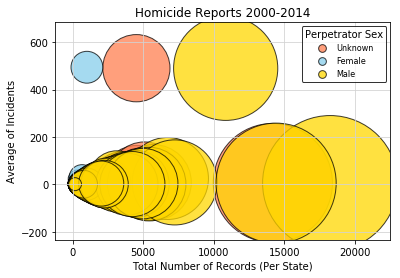

In [31]:
# Obtain the x and y coordinates for Perpetrator Sex
Unknown_Perp = homicide_reports_df[homicide_reports_df["Perpetrator Sex"] == "Unknown"].groupby([homicide_reports_df["State"]])
Female_Perp = homicide_reports_df[homicide_reports_df["Perpetrator Sex"] == "Female"].groupby([homicide_reports_df["State"]])
Male_Perp = homicide_reports_df[homicide_reports_df["Perpetrator Sex"] == "Male"].groupby([homicide_reports_df["State"]])

xaxis_unknown = Unknown_Perp["Record ID"].count()
yaxis_unknown = Unknown_Perp["Incident"].mean()


xaxis_female = Female_Perp["Record ID"].count()
yaxis_female = Female_Perp["Incident"].mean()


xaxis_male = Male_Perp["Record ID"].count()
yaxis_male = Male_Perp["Incident"].mean()


# Build the scatter plots for each Sex types
plt.scatter(xaxis_unknown, yaxis_unknown, label = "Unknown", s=xaxis_unknown, marker="o", facecolors=["coral"], edgecolors="black", alpha = 0.75)
plt.scatter(xaxis_female, yaxis_female, label = "Female",s=xaxis_female, marker="o", facecolors=["skyblue"], edgecolors="black", alpha = 0.75)
plt.scatter(xaxis_male, yaxis_male, label = "Male", s=xaxis_male, marker="o", facecolors=["gold"], edgecolors="black", alpha = 0.75)


# Incorporate the other graph properties
plt.title("Homicide Reports 2000-2014")
plt.xlabel("Total Number of Records (Per State)")
plt.ylabel("Average of Incidents")

# Create a legend
legend = plt.legend(frameon = True, edgecolor = 'black', fontsize = 8, title= "Perpetrator Sex", loc="best")

# Adjust the legend 
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

#Incorporate a text label regarding circle size
#plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
plt.grid(c="lightgrey")  

# Save Figure
#plt.savefig("../Images/Ride Sharing.png", bbox_inches="tight")

# Show plot
plt.show()